In [54]:
# Exploratory analysis for finished tech campaigns
# start with tech, then for all entries in my database 

In [4]:
# Features I already have _______________________________________
# - rewards: n, min, max, intn shipping
# - n creator backed
# - title char len
# - blurb char len
# - launch time (in Unix time)
# - project duration
# - goal

# I could add easily 
# - day of the month
# - month
# - time between launch and ship of rewards
# - title word len
# - blurb word len

In [5]:
# After modeling, 
# Other possible features to extract _____________________________
# - n pictures -- use beautiful soup
# - has video
# - project body length 
# - project n spelling errors
# - text quality, sentiment analysis
# - other reward parameters

# lower priority -- 
# - international projects


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
from IPython.display import display
from IPython.core.pylabtools import getfigs
import seaborn as sns

In [7]:
%matplotlib qt

In [8]:
#from extract_kickstarter_features import *
#%load_ext autoreload
#%autoreload 2

In [9]:
saveas_path = '/Users/jamie/insight data/figures/'

In [10]:
tech_df = pd.read_pickle('tech_df.save')

In [11]:
np.shape(tech_df)

(6633, 12)

In [12]:
tech_df.tail(3)

,id,pledged,goal,n rewards,min reward,max reward,intn ship,n creator backed,title n chars,blurb n chars,launch time,campaign dur
6630,16468,8904,5000,7,1,100,1,0,56,129,1411686079,3459600
6631,16469,615,50000,8,1,1000,0,0,51,103,1409441823,5184000
6632,16470,585549,7500,11,1,1337,1,2,44,114,1413159586,2595600


In [64]:
# create new columns 
tech_df['pledged/goal'] = tech_df['pledged']/tech_df['goal']

In [65]:
tech_df.tail(3)

,id,pledged,goal,n rewards,min reward,max reward,intn ship,n creator backed,title n chars,blurb n chars,launch time,campaign dur,pledged/goal
6630,16468,8904,5000,7,1,100,1,0,56,129,1411686079,3459600,1.7808
6631,16469,615,50000,8,1,1000,0,0,51,103,1409441823,5184000,0.0123
6632,16470,585549,7500,11,1,1337,1,2,44,114,1413159586,2595600,78.0732


In [13]:
#let's find some data stories!

In [40]:
# restrict to projects with goals of less than $500,000
reasonable_goal_is = np.where(tech_df['goal'] < 500000)[0]
print np.shape(reasonable_goal_is)

(6546,)


In [60]:
# restrict to projects with goals of less than $500,000
small_goal_is = np.where(tech_df['goal'] < 25000)[0]
print np.shape(small_goal_is)

(3886,)


In [61]:
plt.close('all')

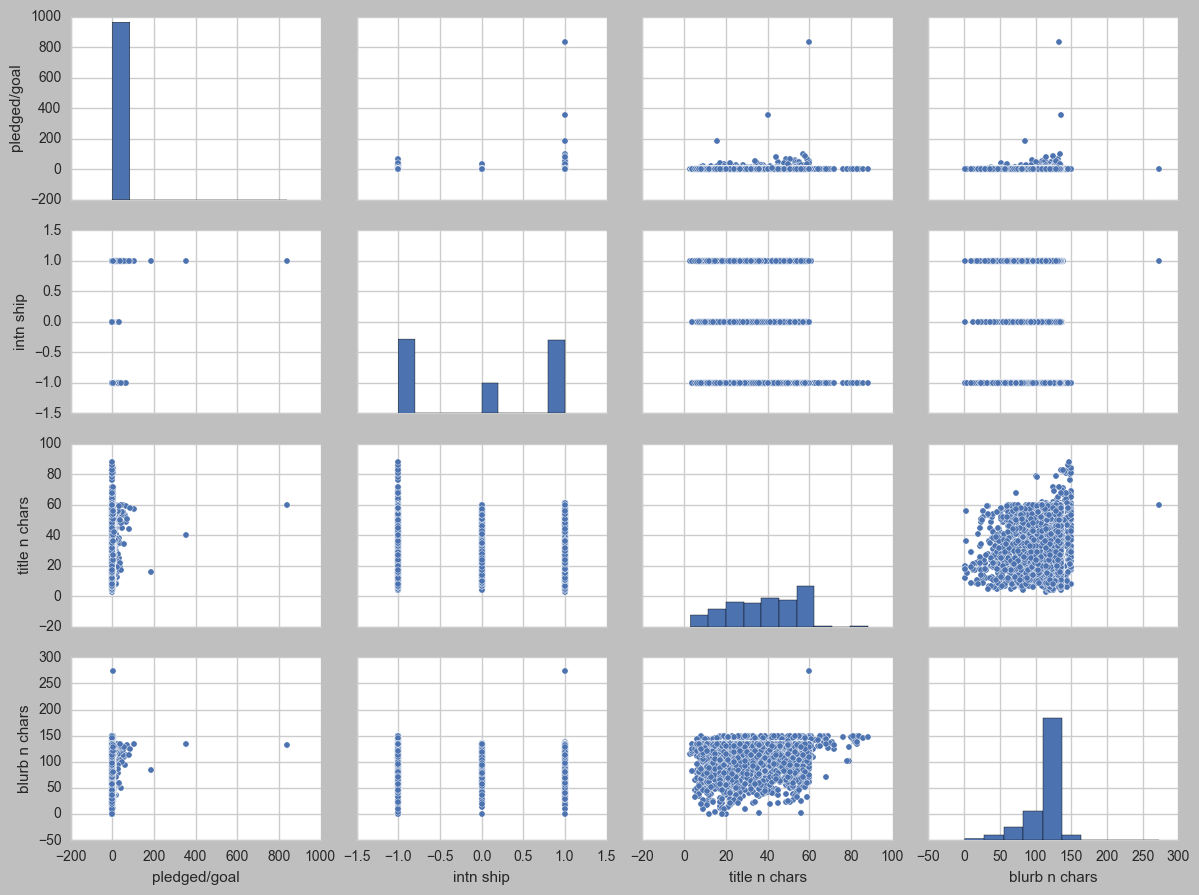

In [67]:
sns.set(style="whitegrid")
g = sns.pairplot(tech_df.ix[small_goal_is,\
                            list(['pledged/goal','intn ship','title n chars','blurb n chars'])])
display(plt.gcf())
plt.close('all')

In [49]:
# clean this up
# why is pledged count going negative? -- can I set bounds? 
# pledged axes have too many zeros -- can I change the notation?
# low roi. skip.

In [52]:
# normalize = true

In [68]:
print tech_df.columns

Index([u'id', u'pledged', u'goal', u'n rewards', u'min reward', u'max reward',
       u'intn ship', u'n creator backed', u'title n chars', u'blurb n chars',
       u'launch time', u'campaign dur', u'pledged/goal'],
      dtype='object')


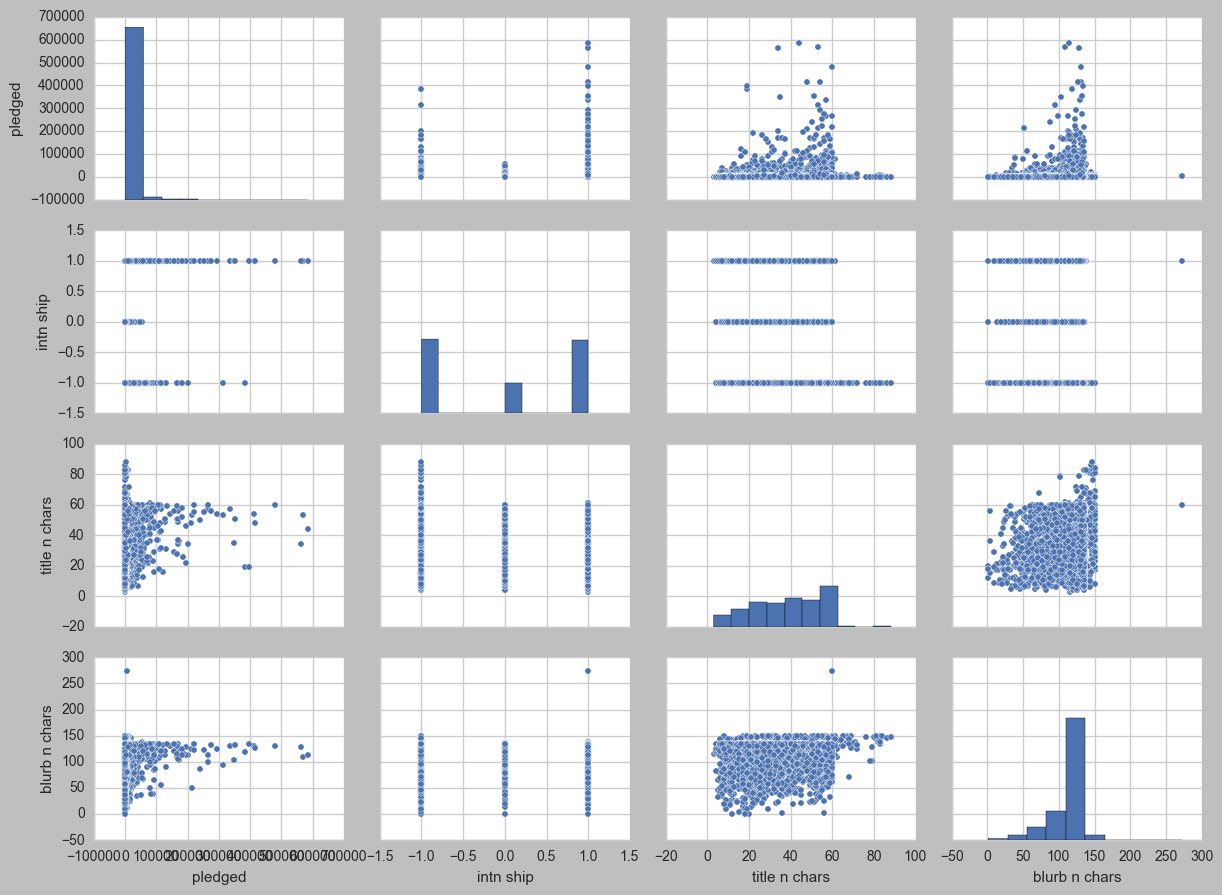

In [69]:
sns.set(style="whitegrid")
g = sns.pairplot(tech_df.ix[small_goal_is,\
                            list(['pledged','intn ship','title n chars','blurb n chars'])])
display(plt.gcf())
plt.close('all')

In [73]:
sns.set(style="whitegrid")
g = sns.pairplot(tech_df.ix[small_goal_is,\
                            list(['pledged/goal','min reward','max reward',\
                                 'n rewards','n creator backed','campaign dur'])])

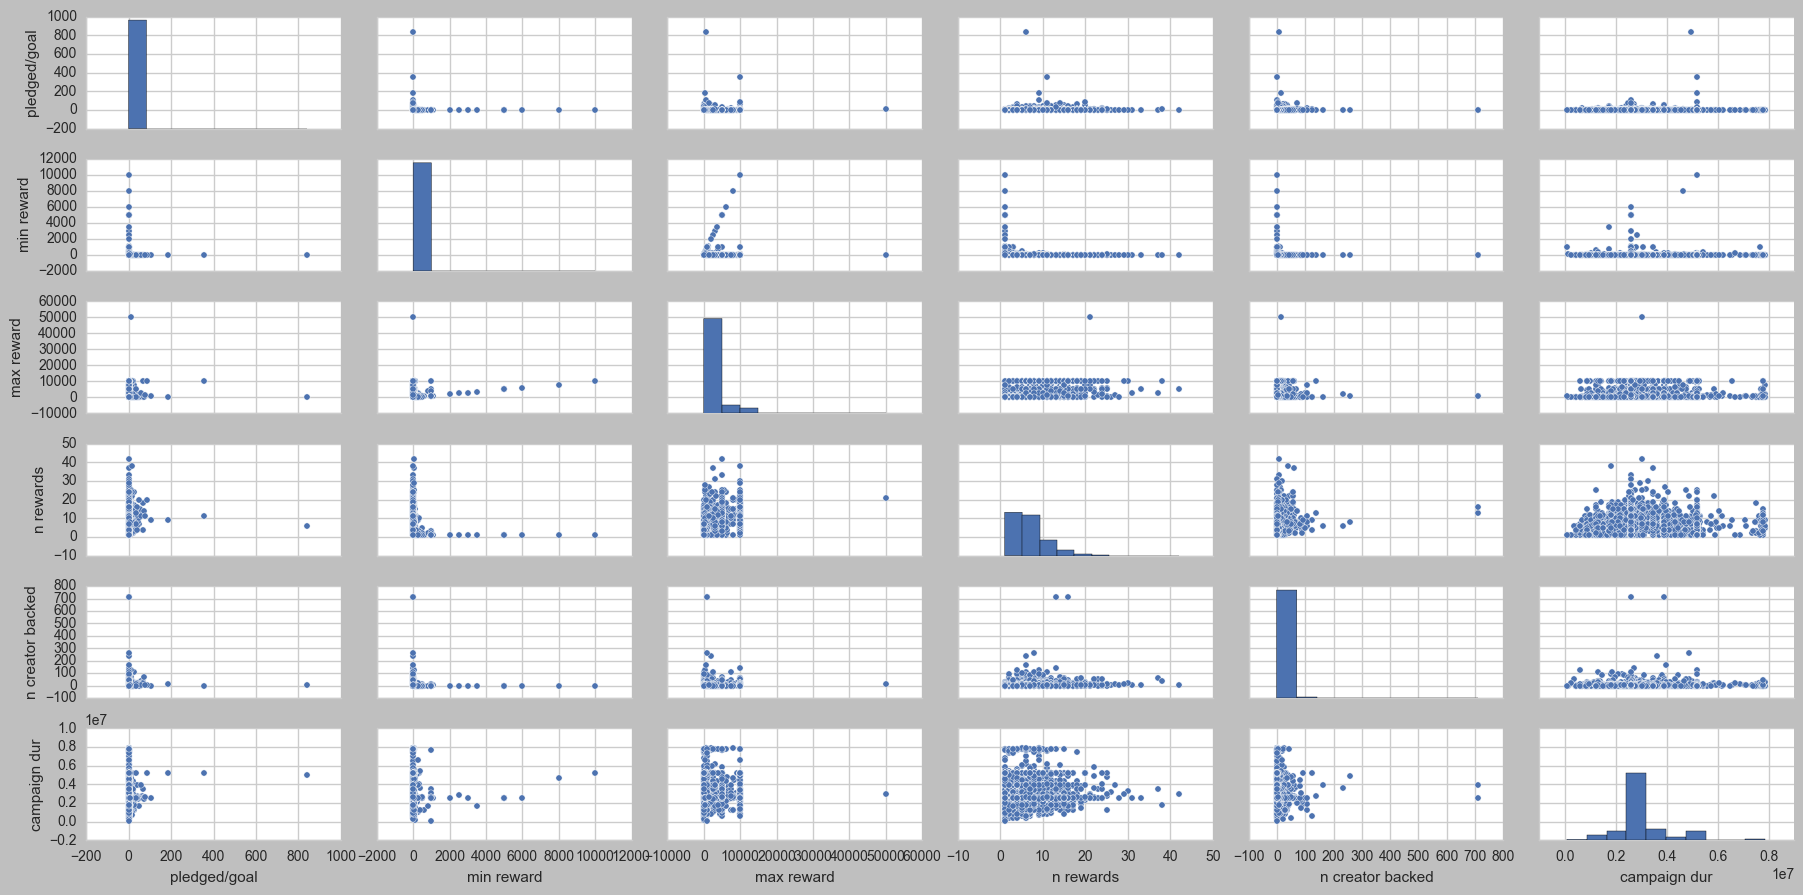

In [74]:
display(plt.gcf())
plt.close('all')

In [75]:
sns.set(style="whitegrid")
g = sns.pairplot(tech_df.ix[small_goal_is,\
                            list(['pledged/goal','n rewards','n creator backed','launch time'])])

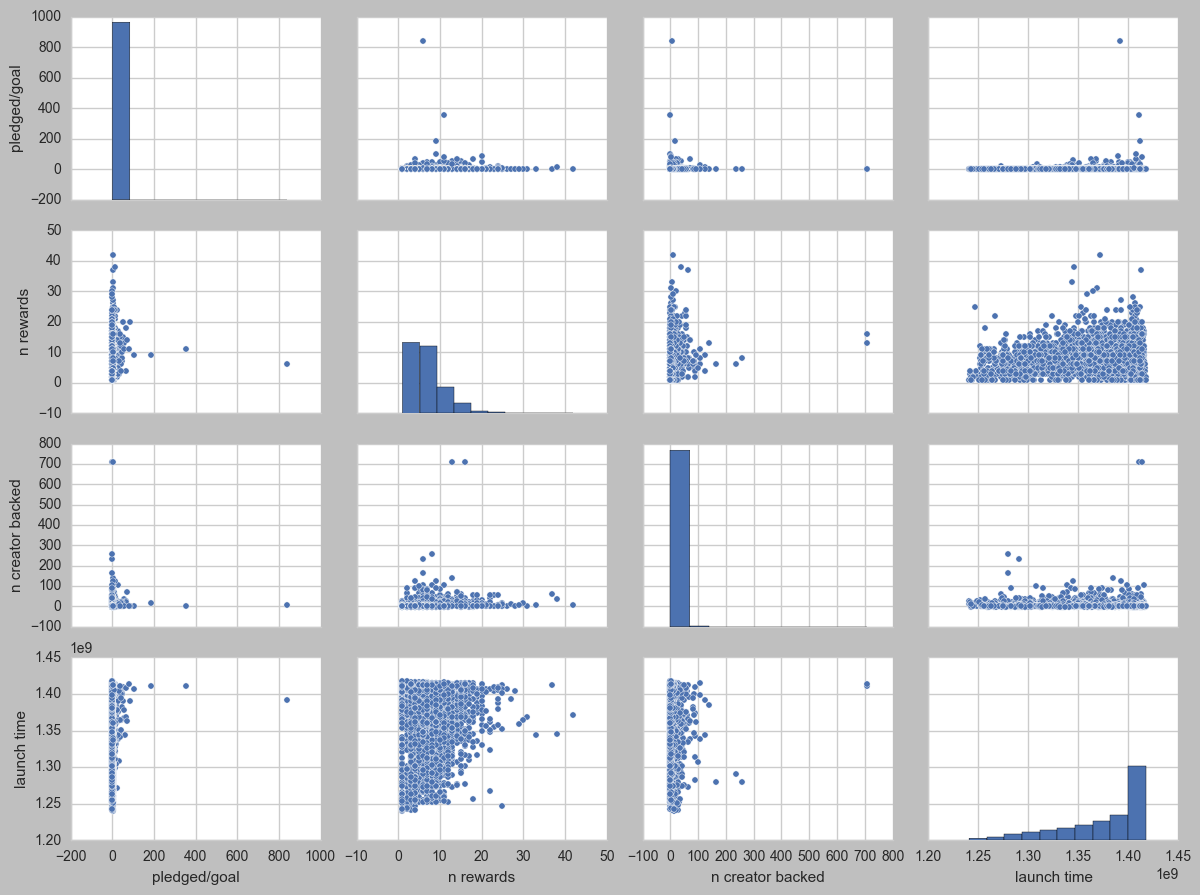

In [76]:
display(plt.gcf())
plt.close('all')